<a href="https://colab.research.google.com/github/RafsanJany-44/Research-NREM-REM/blob/main/V230Master_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [94]:
#from google.colab import drive
#drive.mount('/content/drive')

In [1]:
import numpy as np
import pandas as pd

dataset=pd.read_csv("https://raw.githubusercontent.com/RafsanJany-44/Research-NREM-REM/main/dataset/REM_NREM.csv")


target="Sleep_Stage"

classes = np.array(sorted(list(set(dataset[target]))))


In [2]:
dataset.head()

,Sleep_Stage,MeanP_Alpha_F4,MedianF_Alpha_F4,MeanF_Alpha_F4,Spectral Edge_Alpha_F4,PeakF_Alpha_F4,MeanP_Beta_F4,MedianF_Beta_F4,MeanF_Beta_F4,Spectral Edge_Beta_F4,...,MeanP_Delta_O2,MedianF_Delta_O2,MeanF_Delta_O2,Spectral Edge_Delta_O2,PeakF_Delta_O2,MeanP_Gamma_O2,MedianF_Gamma_O2,MeanF_Gamma_O2,Spectral Edge_Gamma_O2,PeakF_Gamma_O2
0,NREM,0.00034,10.11512,17.85756,17.48293,10.24000,0.00047,17.73268,25.35024,27.47317,...,0.00112,0.74927,6.36878,2.87220,0.62439,0.000076,32.71805,43.83220,49.95122,49.95122
1,NREM,0.00035,10.73951,17.60780,17.10829,9.11610,0.00048,16.85854,25.22537,26.97366,...,0.00070,0.99902,6.86829,3.62146,0.74927,0.000072,32.09366,44.33171,49.95122,49.95122
2,NREM,0.00035,9.36585,17.60780,16.98341,9.24098,0.00042,17.35805,26.09951,28.47220,...,0.00077,1.49854,6.49366,4.12098,0.74927,0.000069,33.09268,43.95707,49.95122,49.95122
3,NREM,0.00050,10.36488,16.60878,15.85951,7.99220,0.00053,15.48488,24.10146,25.72488,...,0.00130,1.87317,6.11902,3.74634,0.37463,0.000070,31.59415,42.83317,49.95122,49.95122
4,NREM,0.00072,9.36585,15.98439,15.48488,7.99220,0.00067,15.11024,22.22829,23.22732,...,0.00123,1.49854,6.61854,3.74634,0.74927,0.000060,29.47122,45.08098,49.95122,49.95122


In [3]:
set(list(dataset[target]))

{'NREM', 'REM'}

In [4]:

from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
dataset[target]=encoder.fit_transform(dataset[target])

In [5]:
set(list(dataset[target]))

{0, 1}

#Feature Selection

In [6]:
X_ = dataset.loc[:, dataset.columns!=target]
y_ = dataset[target]

###Feature Selection (User Defined with Index Range)


*   Index- [245]  to  [274] -> EEG Features
*   Index- [4]    to  [243] -> Normal Features



In [7]:
def FS_UD_index(dataset):
  list_of_feat=[]
  norm_start=int(input("Normal Features Start Index:"))
  norm_end=int(input("Normal Features End Index:"))
  eeg_start=int(input("EEG Features Start Index:"))
  eeg_end=int(input("EEG Features End Index:"))



  list_of_feat=list_of_feat+list(dataset.iloc[:0,norm_start:norm_end])+list(dataset.iloc[:0,eeg_start:eeg_end])
  return list_of_feat


###Feature Selection (User Defined with Individual Feature)

**Please Input 'Subject' colunm name first**

In [8]:

def FS_UD_feat():
  list_of_feat=[]
  num=int(input("Input number of features: "))

  for i in range(num):
    print(i+1,".")
    list_of_feat.append(input("Feature Name: "))
  return list_of_feat


###Feature Selection (Model Free)

**Type-1**

In [9]:


def FS_bestfeatures_1(X_,y_):
  from sklearn.feature_selection import SelectKBest
  bestfeatures_1 = SelectKBest(k=10)
  fit = bestfeatures_1.fit(X_,y_)
  dfscores = pd.DataFrame(fit.scores_)
  dfcolumns = pd.DataFrame(X_.columns)
  featureScores = pd.concat([dfcolumns,dfscores],axis=1)
  featureScores.columns = ['Specs','Score']


  number_of_feat=int(input("Number Of Best Features: "))

  imp=featureScores.nlargest(number_of_feat,'Score')

  print(imp)
  list_of_feat=[]

  for i in range(number_of_feat):
    list_of_feat.append(imp.iloc[:,0:1].values[i][0])


  return list_of_feat

**Type-2**

In [10]:


def FS_bestfeatures_2(X_,y_):
  from sklearn.feature_selection import SelectKBest,f_classif
  bestfeatures_2=SelectKBest(f_classif, k=10)
  fit = bestfeatures_2.fit(X_,y_)
  dfscores = pd.DataFrame(fit.scores_)
  dfcolumns = pd.DataFrame(X_.columns)
  featureScores = pd.concat([dfcolumns,dfscores],axis=1)
  featureScores.columns = ['Specs','Score']


  number_of_feat=int(input("Number Of Best Features: "))

  imp=featureScores.nlargest(number_of_feat,'Score')

  print(imp)
  list_of_feat=[]

  for i in range(number_of_feat):
    list_of_feat.append(imp.iloc[:,0:1].values[i][0])

  return list_of_feat

**Type-3**

In [11]:


def FS_bestfeatures_3(X_,y_):
  from sklearn.feature_selection import SelectFpr, f_classif

  bestfeatures_3=SelectFpr(f_classif, alpha=0.1)
  fit = bestfeatures_3.fit(X_,y_)
  dfscores = pd.DataFrame(fit.scores_)
  dfcolumns = pd.DataFrame(X_.columns)
  featureScores = pd.concat([dfcolumns,dfscores],axis=1)
  featureScores.columns = ['Specs','Score']

  number_of_feat=int(input("Number Of Best Features: "))

  imp=featureScores.nlargest(number_of_feat,'Score')
  
  print(imp)
  list_of_feat=[]

  for i in range(number_of_feat):
    list_of_feat.append(imp.iloc[:,0:1].values[i][0])

  return list_of_feat

###Feature Selection (Model Based)

In [12]:

def FS_model(X_, y_):
  number_of_feat=int(input("Number Of Best Features: "))

  from sklearn.feature_selection import SequentialFeatureSelector
  from sklearn.neighbors import KNeighborsClassifier
  knn = KNeighborsClassifier(n_neighbors=3)
  sfs = SequentialFeatureSelector(knn, n_features_to_select=number_of_feat)
  sfs.fit(X_, y_)
  list_of_feat=[]
  list_of_feat=list(sfs.get_feature_names_out(list(dataset.iloc[:0,3:])))

  return list_of_feat

###Combine in a def

In [13]:
def Feat_Select(num,dataset,X_,y_):
  if num==0:
    return list(X_.columns)
  if num==1:
    return FS_UD_index(dataset)
  elif num==2:
    return FS_UD_feat()
  elif num==3:
    return FS_bestfeatures_1(X_,y_)
  elif num==4:
    return FS_bestfeatures_2(X_,y_)
  elif num==5:
    return FS_bestfeatures_3(X_,y_)
  elif num==6:
    return FS_model(X_, y_)

#Feature Selection Drop Down

In [14]:
import ipywidgets as widgets
from IPython.display import display

key=widgets.Dropdown(
    options=[('ALL', 0),('User Defined with Index Range', 1), ('User Defined with Individual Feature', 2),
             ('Model Free 1', 3),('Model Free 2',4),('Model Free 3',5),('Model Based:KNN',6)],
    value=0,
    description='Feture Select:',
)
display(key)


Dropdown(description='Feture Select:', options=(('ALL', 0), ('User Defined with Index Range', 1), ('User Defin…

In [15]:
list_of_feat=Feat_Select(key.value,dataset,X_,y_)

In [16]:
print(len(list_of_feat))

75


#Data Spliting

In [17]:
print(*list_of_feat,sep="\n")

MeanP_Alpha_F4
MedianF_Alpha_F4
MeanF_Alpha_F4
Spectral Edge_Alpha_F4
PeakF_Alpha_F4
MeanP_Beta_F4
MedianF_Beta_F4
MeanF_Beta_F4
Spectral Edge_Beta_F4
PeakF_Beta_F4
MeanP_Theta_F4
MedianF_Theta_F4
MeanF_Theta_F4
Spectral Edge_Theta_F4
PeakF_Theta_F4
MeanP_Delta_F4
MedianF_Delta_F4
MeanF_Delta_F4
Spectral Edge_Delta_F4
PeakF_Delta_F4
MeanP_Gamma_F4
MedianF_Gamma_F4
MeanF_Gamma_F4
Spectral Edge_Gamma_F4
PeakF_Gamma_F4
MeanP_Alpha_C4
MedianF_Alpha_C4
MeanF_Alpha_C4
Spectral Edge_Alpha_C4
PeakF_Alpha_C4
MeanP_Beta_C4
MedianF_Beta_C4
MeanF_Beta_C4
Spectral Edge_Beta_C4
PeakF_Beta_C4
MeanP_Theta_C4
MedianF_Theta_C4
MeanF_Theta_C4
Spectral Edge_Theta_C4
PeakF_Theta_C4
MeanP_Delta_C4
MedianF_Delta_C4
MeanF_Delta_C4
Spectral Edge_Delta_C4
PeakF_Delta_C4
MeanP_Gamma_C4
MedianF_Gamma_C4
MeanF_Gamma_C4
Spectral Edge_Gamma_C4
PeakF_Gamma_C4
MeanP_Alpha_O2
MedianF_Alpha_O2
MeanF_Alpha_O2
Spectral Edge_Alpha_O2
PeakF_Alpha_O2
MeanP_Beta_O2
MedianF_Beta_O2
MeanF_Beta_O2
Spectral Edge_Beta_O2
PeakF_Bet

In [18]:
X_new = dataset[list_of_feat]
y_new = dataset.iloc[:, 1]

print(type(X_new))
print(type(y_new))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [19]:
X_new = dataset[list_of_feat]
y_new = dataset[target]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size = 0.2, random_state = 0)
result={}



---





---



#ADABOOST

In [114]:
from sklearn.ensemble import AdaBoostClassifier

ada_defult = AdaBoostClassifier(random_state=0)
ada_defult.fit(X_train, y_train)
y_pred = ada_defult.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(ada_defult,1,'AdaBoostClassifier')]=accuracy_score(y_test, y_pred)


[[13646   814]
 [ 1523  1837]]
              precision    recall  f1-score   support

           0       0.90      0.94      0.92     14460
           1       0.69      0.55      0.61      3360

    accuracy                           0.87     17820
   macro avg       0.80      0.75      0.77     17820
weighted avg       0.86      0.87      0.86     17820

Accurecy:  0.8688552188552189


1/100 round completed......................... Accurecy: 0.8114478114478114
2/100 round completed......................... Accurecy: 0.7918069584736251
3/100 round completed......................... Accurecy: 0.8333333333333334
4/100 round completed......................... Accurecy: 0.8333333333333334
5/100 round completed......................... Accurecy: 0.8333333333333334
6/100 round completed......................... Accurecy: 0.8354657687991022
7/100 round completed......................... Accurecy: 0.826936026936027
8/100 round completed......................... Accurecy: 0.8359708193041526
9/100 round completed......................... Accurecy: 0.8425925925925926
10/100 round completed......................... Accurecy: 0.8408529741863076
11/100 round completed......................... Accurecy: 0.8455106621773288
12/100 round completed......................... Accurecy: 0.8452300785634119
13/100 round completed......................... Accurecy: 0.8465768799102132
14/100 ro

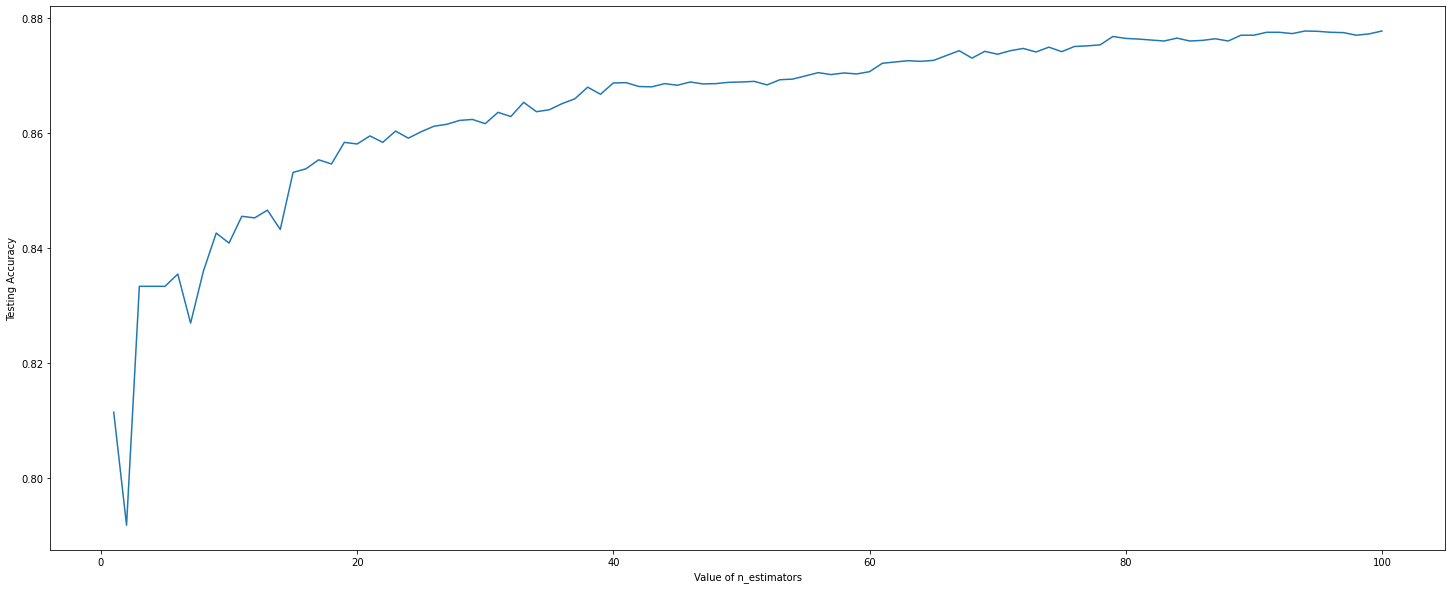

In [115]:
from sklearn.ensemble import AdaBoostClassifier
N=100
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  classifier = AdaBoostClassifier(n_estimators=k,random_state=0)
  classifier.fit(X_train, y_train)
  y_pred=classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))



%matplotlib inline
import matplotlib.pyplot as plt
#plot the relationship between K and the testing accuracy
plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best n_estimators:")
best_estimator=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_estimator)

In [116]:
from sklearn.ensemble import AdaBoostClassifier

ada_best_estimator = AdaBoostClassifier(n_estimators=best_estimator,random_state=0)
ada_best_estimator.fit(X_train, y_train)
y_pred = ada_best_estimator.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(ada_best_estimator,1,'AdaBoostClassifier')]=accuracy_score(y_test, y_pred)

[[13648   812]
 [ 1367  1993]]
              precision    recall  f1-score   support

           0       0.91      0.94      0.93     14460
           1       0.71      0.59      0.65      3360

    accuracy                           0.88     17820
   macro avg       0.81      0.77      0.79     17820
weighted avg       0.87      0.88      0.87     17820

Accurecy:  0.8777216610549944




---



---



#Graddient Boosting

In [117]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RepeatedStratifiedKFold

gradBoost_default = GradientBoostingClassifier(random_state=0)
gradBoost_default.fit(X_train, y_train)
y_pred = gradBoost_default.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(gradBoost_default,2,'GradientBoostingClassifier')]=accuracy_score(y_test, y_pred)

[[13882   578]
 [ 1373  1987]]
              precision    recall  f1-score   support

           0       0.91      0.96      0.93     14460
           1       0.77      0.59      0.67      3360

    accuracy                           0.89     17820
   macro avg       0.84      0.78      0.80     17820
weighted avg       0.88      0.89      0.88     17820

Accurecy:  0.8905162738496072


1/75 round completed......................... Accurecy: 0.8114478114478114
2/75 round completed......................... Accurecy: 0.8114478114478114
3/75 round completed......................... Accurecy: 0.8114478114478114
4/75 round completed......................... Accurecy: 0.8114478114478114
5/75 round completed......................... Accurecy: 0.8114478114478114
6/75 round completed......................... Accurecy: 0.8114478114478114
7/75 round completed......................... Accurecy: 0.8114478114478114
8/75 round completed......................... Accurecy: 0.8199775533108866
9/75 round completed......................... Accurecy: 0.8268237934904602
10/75 round completed......................... Accurecy: 0.8305836139169472
11/75 round completed......................... Accurecy: 0.8337261503928171
12/75 round completed......................... Accurecy: 0.8355780022446689
13/75 round completed......................... Accurecy: 0.8383838383838383
14/75 round completed

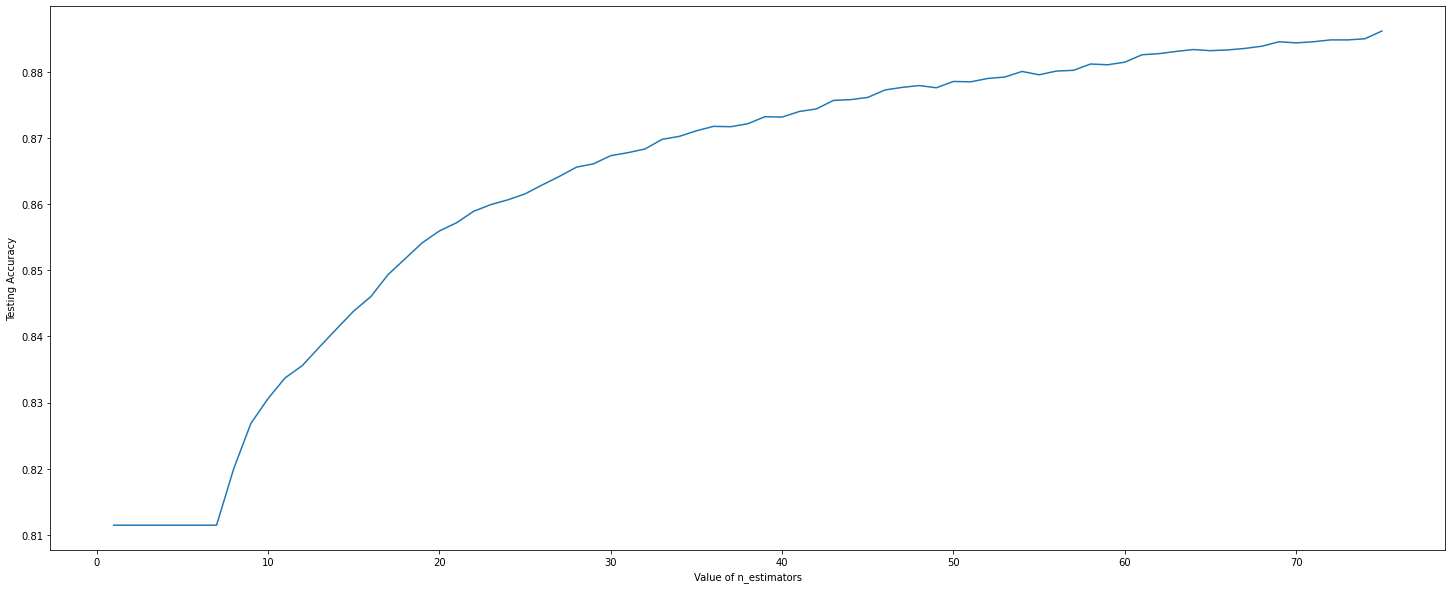

In [118]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
N=75
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  classifier = GradientBoostingClassifier(n_estimators=k,random_state=0)
  classifier.fit(X_train, y_train)
  y_pred=classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))



%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best n_estimators:")
best_estimator=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_estimator)

1/30 round completed......................... Accurecy: 0.8538720538720539
2/30 round completed......................... Accurecy: 0.8754208754208754
3/30 round completed......................... Accurecy: 0.8905162738496072
4/30 round completed......................... Accurecy: 0.9012345679012346
5/30 round completed......................... Accurecy: 0.9132435465768799
6/30 round completed......................... Accurecy: 0.9217171717171717
7/30 round completed......................... Accurecy: 0.926936026936027
8/30 round completed......................... Accurecy: 0.9312570145903479
9/30 round completed......................... Accurecy: 0.9333333333333333
10/30 round completed......................... Accurecy: 0.9357463524130191
11/30 round completed......................... Accurecy: 0.935297418630752
12/30 round completed......................... Accurecy: 0.9358024691358025
13/30 round completed......................... Accurecy: 0.9351290684624018
14/30 round completed..

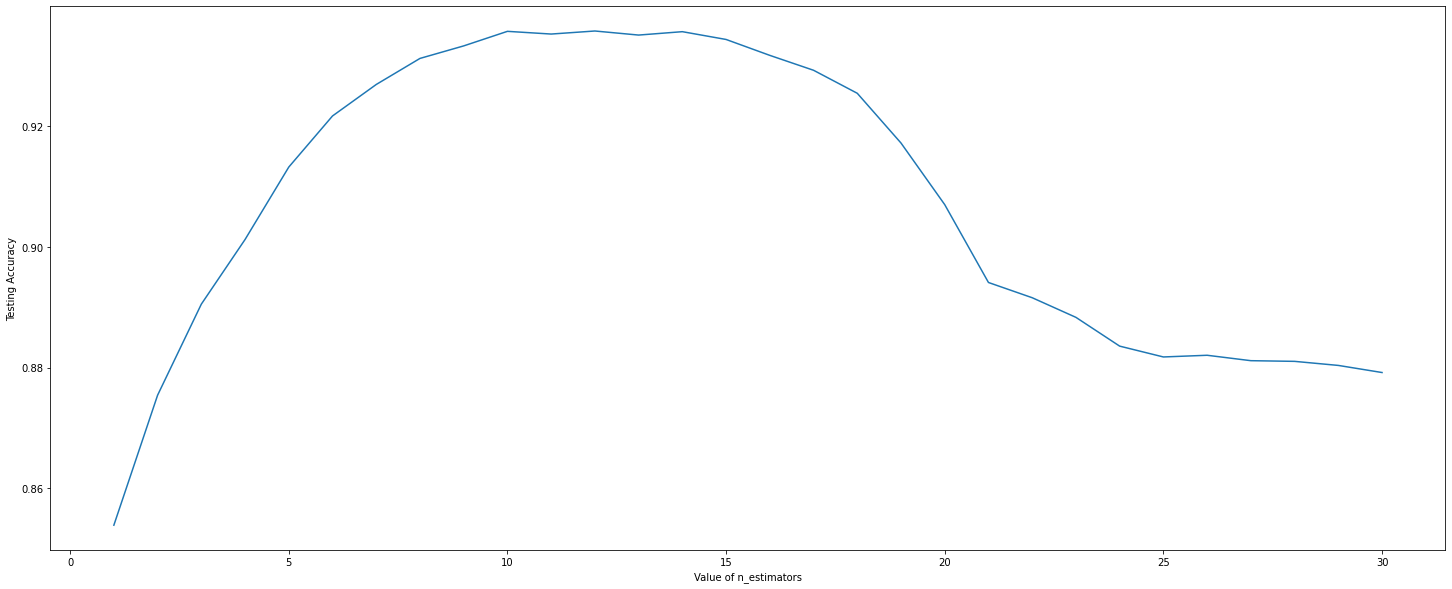

In [119]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
N=30
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  classifier = GradientBoostingClassifier(max_depth=k,random_state=0)
  classifier.fit(X_train, y_train)
  y_pred=classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))



%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best Depth:")
best_depth=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_depth)

In [120]:
from sklearn.ensemble import GradientBoostingClassifier

gradBoost_estimator = GradientBoostingClassifier(n_estimators=best_estimator,random_state=0)
gradBoost_estimator.fit(X_train, y_train)
y_pred = gradBoost_estimator.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(gradBoost_estimator,2,'GradientBoostingClassifier')]=accuracy_score(y_test, y_pred)

[[13912   548]
 [ 1480  1880]]
              precision    recall  f1-score   support

           0       0.90      0.96      0.93     14460
           1       0.77      0.56      0.65      3360

    accuracy                           0.89     17820
   macro avg       0.84      0.76      0.79     17820
weighted avg       0.88      0.89      0.88     17820

Accurecy:  0.8861952861952862


In [121]:
from sklearn.ensemble import GradientBoostingClassifier

gradBoost_depth = GradientBoostingClassifier(max_depth=best_depth,random_state=0)
gradBoost_depth.fit(X_train, y_train)
y_pred = gradBoost_depth.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))

result[(gradBoost_depth,2,'GradientBoostingClassifier')]=accuracy_score(y_test, y_pred)

[[14094   366]
 [  778  2582]]
              precision    recall  f1-score   support

           0       0.95      0.97      0.96     14460
           1       0.88      0.77      0.82      3360

    accuracy                           0.94     17820
   macro avg       0.91      0.87      0.89     17820
weighted avg       0.93      0.94      0.93     17820

Accurecy:  0.9358024691358025


In [122]:
from sklearn.ensemble import GradientBoostingClassifier

gradBoost_all = GradientBoostingClassifier(n_estimators=best_estimator,max_depth=best_depth,random_state=0)
gradBoost_all.fit(X_train, y_train)
y_pred = gradBoost_all.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))

result[(gradBoost_all,2,'GradientBoostingClassifier')]=accuracy_score(y_test, y_pred)

[[14071   389]
 [  822  2538]]
              precision    recall  f1-score   support

           0       0.94      0.97      0.96     14460
           1       0.87      0.76      0.81      3360

    accuracy                           0.93     17820
   macro avg       0.91      0.86      0.88     17820
weighted avg       0.93      0.93      0.93     17820

Accurecy:  0.9320426487093154




---



---



#Random Forest

In [20]:
from sklearn.ensemble import RandomForestClassifier
rf_default = RandomForestClassifier(random_state=0)
rf_default.fit(X_train, y_train)
y_pred=rf_default.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(rf_default,3,'RandomForestClassifier')]=accuracy_score(y_test, y_pred)

[[14149   311]
 [  922  2438]]
              precision    recall  f1-score   support

           0       0.94      0.98      0.96     14460
           1       0.89      0.73      0.80      3360

    accuracy                           0.93     17820
   macro avg       0.91      0.85      0.88     17820
weighted avg       0.93      0.93      0.93     17820

Accurecy:  0.9308080808080809


1/75 round completed......................... Accurecy: 0.849270482603816
2/75 round completed......................... Accurecy: 0.8708193041526375
3/75 round completed......................... Accurecy: 0.8915824915824916
4/75 round completed......................... Accurecy: 0.8927048260381594
5/75 round completed......................... Accurecy: 0.9038159371492704
6/75 round completed......................... Accurecy: 0.9037598204264871
7/75 round completed......................... Accurecy: 0.9118967452300786
8/75 round completed......................... Accurecy: 0.9086980920314254
9/75 round completed......................... Accurecy: 0.9139169472502806
10/75 round completed......................... Accurecy: 0.912401795735129
11/75 round completed......................... Accurecy: 0.9162738496071829
12/75 round completed......................... Accurecy: 0.9152076318742985
13/75 round completed......................... Accurecy: 0.9185185185185185
14/75 round completed..

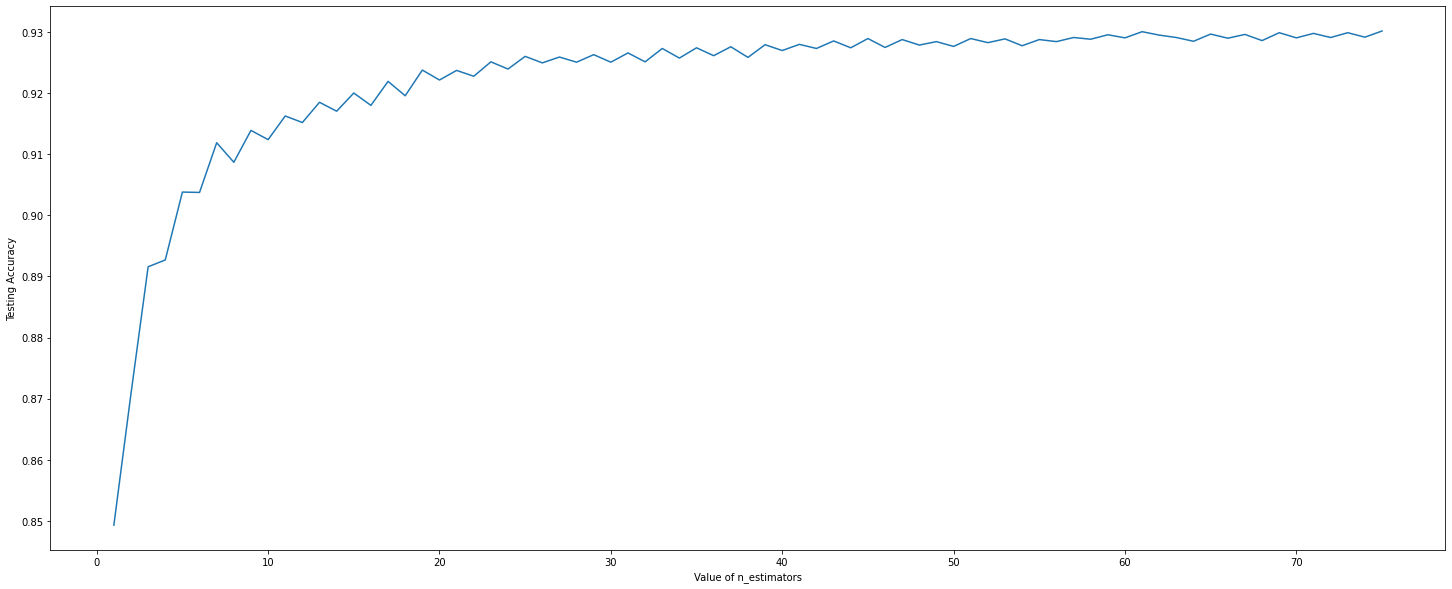

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
N=75
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  classifier = RandomForestClassifier(n_estimators=k,random_state=0)
  classifier.fit(X_train, y_train)
  y_pred=classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))



%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best n_estimators:")
best_estimator=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_estimator)

1/30 round completed......................... Accurecy: 0.8114478114478114
2/30 round completed......................... Accurecy: 0.8114478114478114
3/30 round completed......................... Accurecy: 0.8208193041526375
4/30 round completed......................... Accurecy: 0.8427048260381593
5/30 round completed......................... Accurecy: 0.8549943883277217
6/30 round completed......................... Accurecy: 0.8658810325476992
7/30 round completed......................... Accurecy: 0.8755892255892256
8/30 round completed......................... Accurecy: 0.8870370370370371
9/30 round completed......................... Accurecy: 0.8962401795735129
10/30 round completed......................... Accurecy: 0.9037037037037037
11/30 round completed......................... Accurecy: 0.9101010101010101
12/30 round completed......................... Accurecy: 0.9156565656565656
13/30 round completed......................... Accurecy: 0.9194163860830528
14/30 round completed

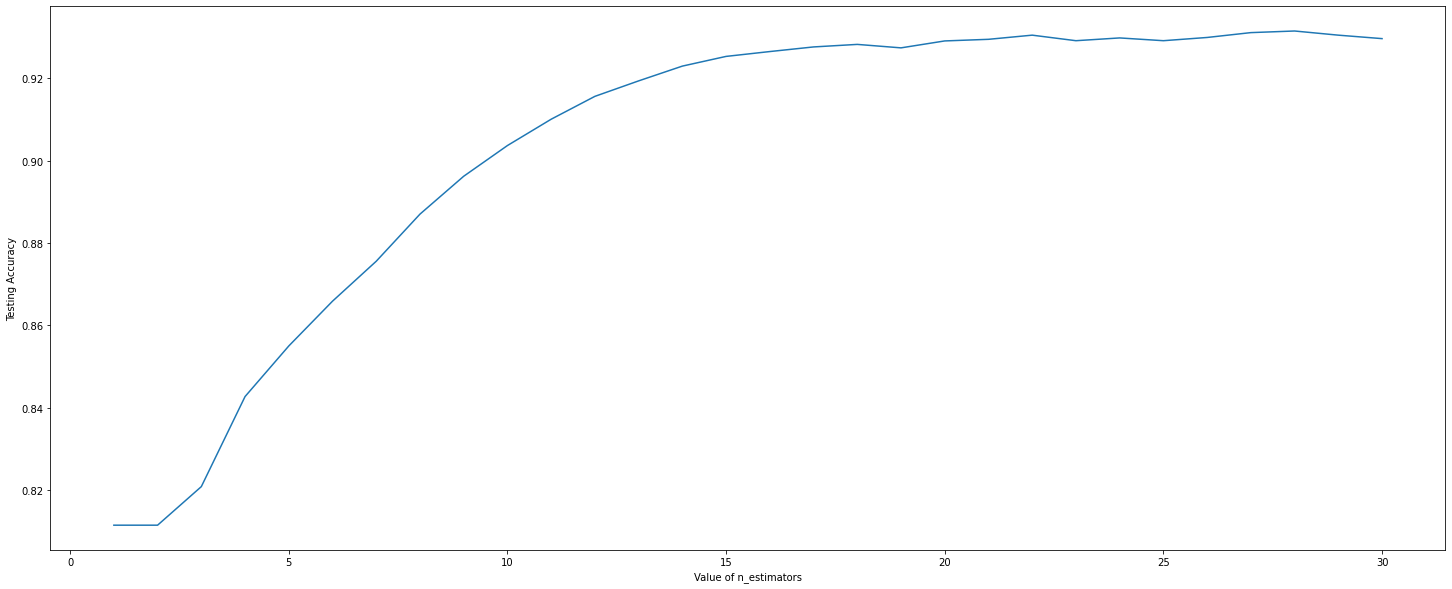

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
N=30
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  classifier = RandomForestClassifier(max_depth=k,random_state=0)
  classifier.fit(X_train, y_train)
  y_pred=classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))



%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best Depth:")
best_depth=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_depth)

In [23]:
from sklearn.ensemble import RandomForestClassifier
rf_estimator = RandomForestClassifier(n_estimators=best_estimator,random_state=0)
rf_estimator.fit(X_train, y_train)
y_pred=rf_estimator.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(rf_estimator,3,'RandomForestClassifier')]=accuracy_score(y_test, y_pred)

[[14125   335]
 [  909  2451]]
              precision    recall  f1-score   support

           0       0.94      0.98      0.96     14460
           1       0.88      0.73      0.80      3360

    accuracy                           0.93     17820
   macro avg       0.91      0.85      0.88     17820
weighted avg       0.93      0.93      0.93     17820

Accurecy:  0.9301907968574635


In [24]:
from sklearn.ensemble import RandomForestClassifier
rf_depth = RandomForestClassifier(max_depth=best_depth,random_state=0)
rf_depth.fit(X_train, y_train)
y_pred=rf_depth.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(rf_depth,3,'RandomForestClassifier')]=accuracy_score(y_test, y_pred)

[[14150   310]
 [  910  2450]]
              precision    recall  f1-score   support

           0       0.94      0.98      0.96     14460
           1       0.89      0.73      0.80      3360

    accuracy                           0.93     17820
   macro avg       0.91      0.85      0.88     17820
weighted avg       0.93      0.93      0.93     17820

Accurecy:  0.9315375982042648


In [25]:
from sklearn.ensemble import RandomForestClassifier
rf_all = RandomForestClassifier(n_estimators=best_estimator,max_depth=best_depth,random_state=0)
rf_all.fit(X_train, y_train)
y_pred=rf_all.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(rf_all,3,'RandomForestClassifier')]=accuracy_score(y_test, y_pred)

[[14131   329]
 [  898  2462]]
              precision    recall  f1-score   support

           0       0.94      0.98      0.96     14460
           1       0.88      0.73      0.80      3360

    accuracy                           0.93     17820
   macro avg       0.91      0.85      0.88     17820
weighted avg       0.93      0.93      0.93     17820

Accurecy:  0.9311447811447812




---



---



#XGB

In [26]:


import xgboost as xgb
xgb_deafult = xgb.XGBClassifier(random_state=0)
xgb_deafult.fit(X_train,y_train)
y_pred = xgb_deafult.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(xgb_deafult,4,'xgboost')]=accuracy_score(y_test, y_pred)

[[13894   566]
 [ 1387  1973]]
              precision    recall  f1-score   support

           0       0.91      0.96      0.93     14460
           1       0.78      0.59      0.67      3360

    accuracy                           0.89     17820
   macro avg       0.84      0.77      0.80     17820
weighted avg       0.88      0.89      0.88     17820

Accurecy:  0.8904040404040404


1/175 round completed......................... Accurecy: 0.8357463524130191
2/175 round completed......................... Accurecy: 0.8365319865319866
3/175 round completed......................... Accurecy: 0.8369248035914703
4/175 round completed......................... Accurecy: 0.8410213243546577
5/175 round completed......................... Accurecy: 0.842368125701459
6/175 round completed......................... Accurecy: 0.8449494949494949
7/175 round completed......................... Accurecy: 0.8463524130190797
8/175 round completed......................... Accurecy: 0.8460157126823793
9/175 round completed......................... Accurecy: 0.8456228956228956
10/175 round completed......................... Accurecy: 0.8500561167227834
11/175 round completed......................... Accurecy: 0.8505611672278339
12/175 round completed......................... Accurecy: 0.851010101010101
13/175 round completed......................... Accurecy: 0.8528619528619529
14/175 rou

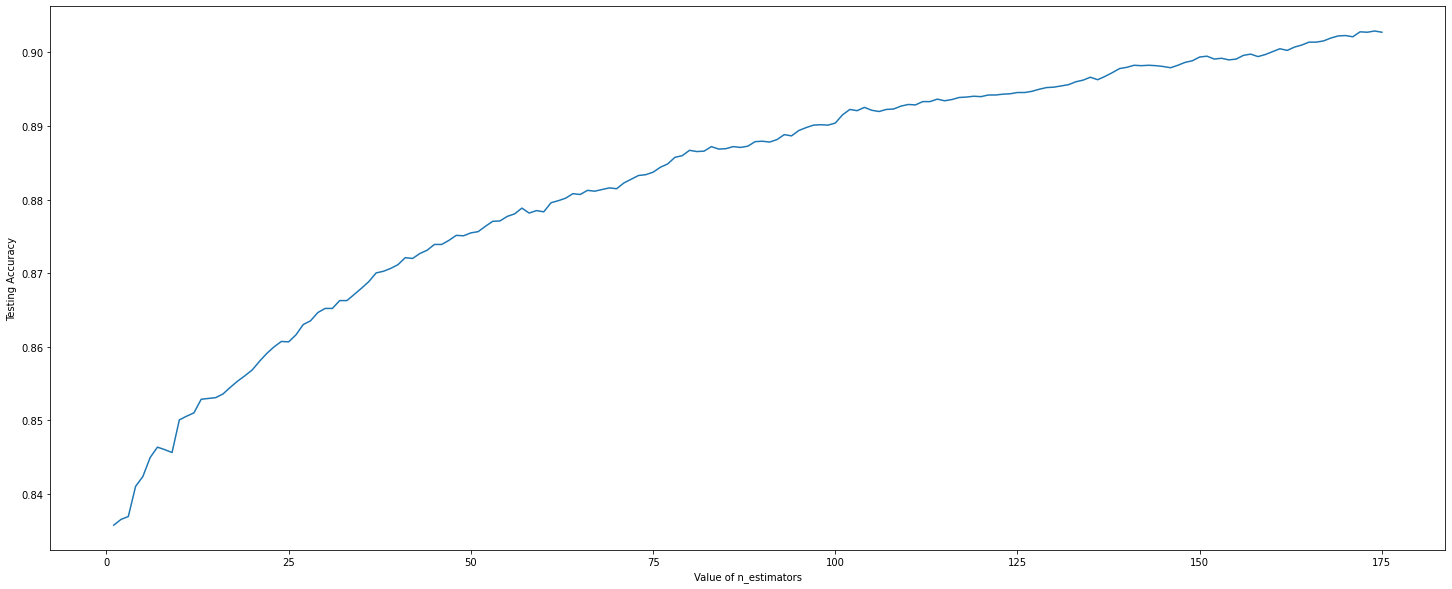

In [27]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
N=175
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  xgb_classifier = xgb.XGBClassifier(n_estimators=k,random_state=0)
  xgb_classifier.fit(X_train, y_train)
  y_pred=xgb_classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))


%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best n_estimators:")
best_estimator=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_estimator)

1/30 round completed......................... Accurecy: 0.8512906846240179
2/30 round completed......................... Accurecy: 0.8761503928170595
3/30 round completed......................... Accurecy: 0.8904040404040404
4/30 round completed......................... Accurecy: 0.9012345679012346
5/30 round completed......................... Accurecy: 0.9136924803591471
6/30 round completed......................... Accurecy: 0.9208754208754208
7/30 round completed......................... Accurecy: 0.9285072951739618
8/30 round completed......................... Accurecy: 0.932267115600449
9/30 round completed......................... Accurecy: 0.9328843995510662
10/30 round completed......................... Accurecy: 0.9365319865319865
11/30 round completed......................... Accurecy: 0.9361391694725028
12/30 round completed......................... Accurecy: 0.9375420875420876
13/30 round completed......................... Accurecy: 0.938047138047138
14/30 round completed..

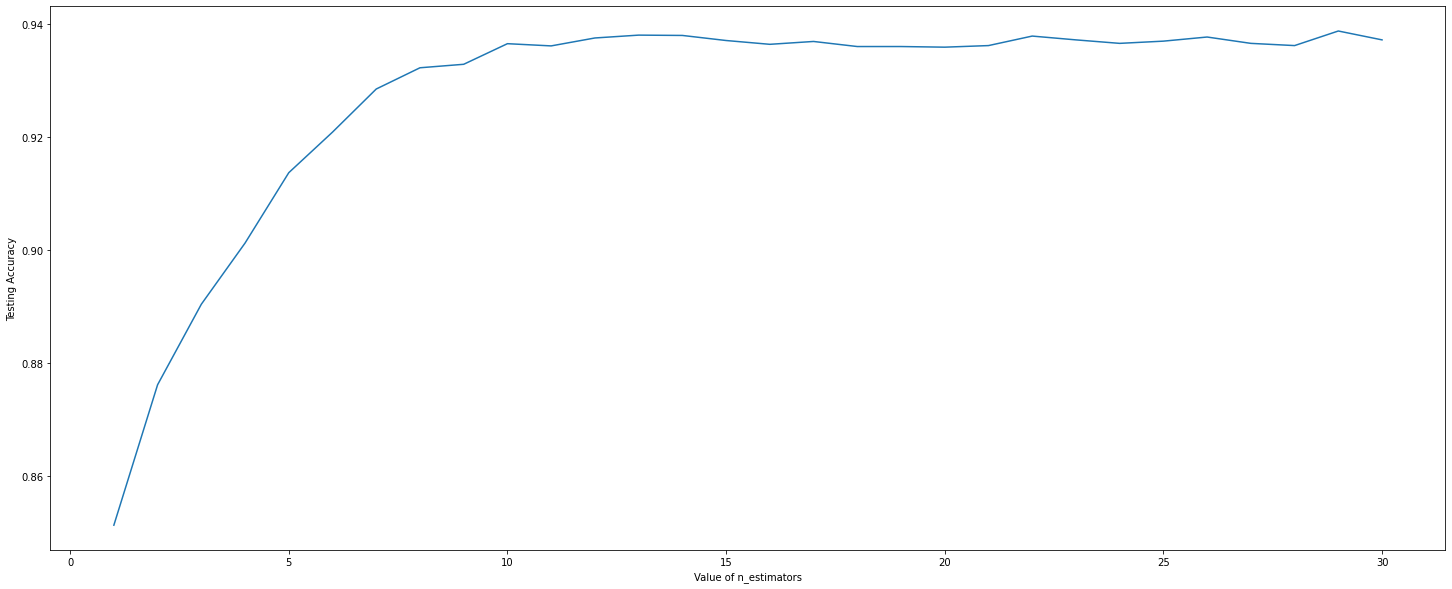

In [28]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
N=30
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  xgb_classifier = xgb.XGBClassifier(max_depth=k,random_state=0)
  xgb_classifier.fit(X_train, y_train)
  y_pred=xgb_classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))


%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best depth:")
best_depth=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_depth)

In [29]:
import xgboost as xgb
xgb_depth = xgb.XGBClassifier(max_depth=best_depth,random_state=0)
xgb_depth.fit(X_train,y_train)
y_pred = xgb_depth.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(xgb_depth,4,'xgboost')]=accuracy_score(y_test, y_pred)
print(xgb_depth)

[[14099   361]
 [  730  2630]]
              precision    recall  f1-score   support

           0       0.95      0.98      0.96     14460
           1       0.88      0.78      0.83      3360

    accuracy                           0.94     17820
   macro avg       0.92      0.88      0.90     17820
weighted avg       0.94      0.94      0.94     17820

Accurecy:  0.9387766554433221
XGBClassifier(max_depth=29)


In [30]:
import xgboost as xgb
xgb_estimator = xgb.XGBClassifier(n_estimators=best_estimator,random_state=0)
xgb_estimator.fit(X_train,y_train)
y_pred = xgb_estimator.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(xgb_estimator,4,'xgboost')]=accuracy_score(y_test, y_pred)
print(xgb_estimator)

[[13886   574]
 [ 1156  2204]]
              precision    recall  f1-score   support

           0       0.92      0.96      0.94     14460
           1       0.79      0.66      0.72      3360

    accuracy                           0.90     17820
   macro avg       0.86      0.81      0.83     17820
weighted avg       0.90      0.90      0.90     17820

Accurecy:  0.9029180695847363
XGBClassifier(n_estimators=174)


In [31]:
import xgboost as xgb
xgb_all = xgb.XGBClassifier(n_estimators=best_estimator,max_depth=best_depth,random_state=0)
xgb_all.fit(X_train,y_train)
y_pred = xgb_all.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(xgb_all,4,'xgboost')]=accuracy_score(y_test, y_pred)

[[14103   357]
 [  697  2663]]
              precision    recall  f1-score   support

           0       0.95      0.98      0.96     14460
           1       0.88      0.79      0.83      3360

    accuracy                           0.94     17820
   macro avg       0.92      0.88      0.90     17820
weighted avg       0.94      0.94      0.94     17820

Accurecy:  0.9408529741863075


#KNN

In [32]:
from sklearn.neighbors import KNeighborsClassifier
knn_default = KNeighborsClassifier()
knn_default.fit(X_train, y_train)
y_pred=knn_default.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(knn_default,5,'KNeighborsClassifier')]=accuracy_score(y_test, y_pred)

[[13789   671]
 [  882  2478]]
              precision    recall  f1-score   support

           0       0.94      0.95      0.95     14460
           1       0.79      0.74      0.76      3360

    accuracy                           0.91     17820
   macro avg       0.86      0.85      0.85     17820
weighted avg       0.91      0.91      0.91     17820

Accurecy:  0.9128507295173962


1/75 round completed......................... Accurecy: 0.908641975308642
2/75 round completed......................... Accurecy: 0.9079685746352413
3/75 round completed......................... Accurecy: 0.9131313131313131
4/75 round completed......................... Accurecy: 0.9115600448933783
5/75 round completed......................... Accurecy: 0.9128507295173962
6/75 round completed......................... Accurecy: 0.9101571268237935
7/75 round completed......................... Accurecy: 0.9105499438832773
8/75 round completed......................... Accurecy: 0.9109427609427609
9/75 round completed......................... Accurecy: 0.9086980920314254
10/75 round completed......................... Accurecy: 0.9081369248035914
11/75 round completed......................... Accurecy: 0.9074074074074074
12/75 round completed......................... Accurecy: 0.9072951739618407
13/75 round completed......................... Accurecy: 0.9072951739618407
14/75 round completed.

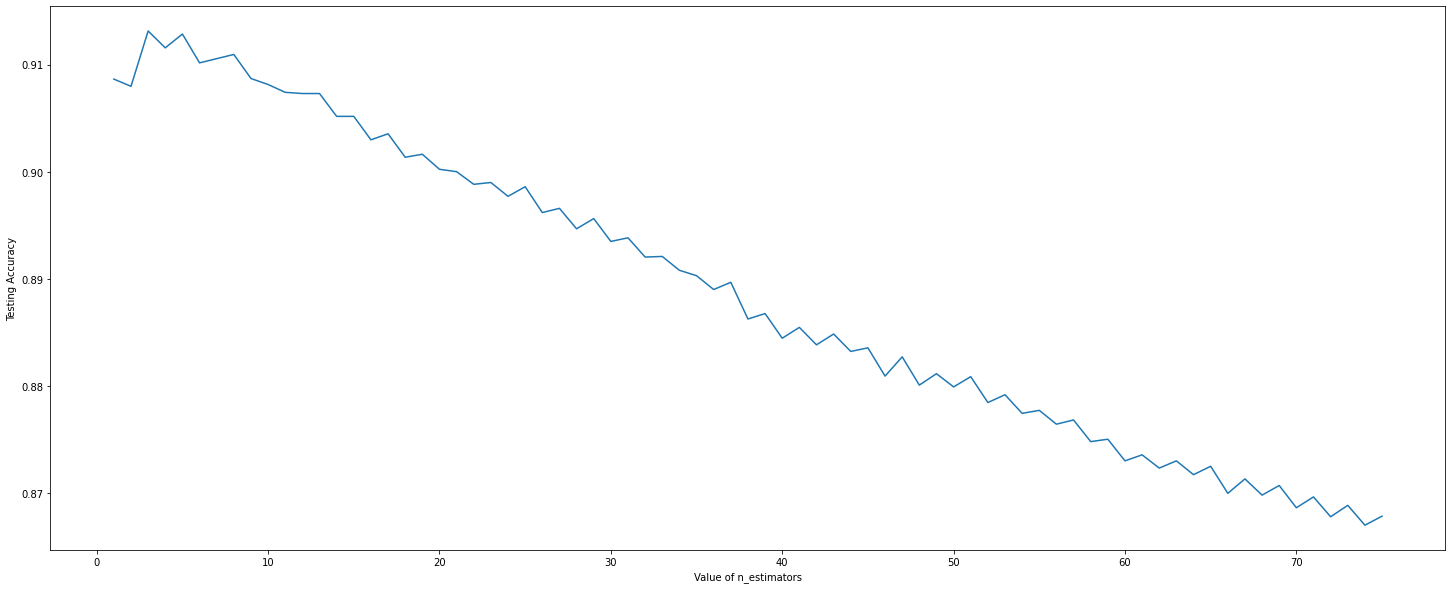

In [33]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
Neighbors=75
k_range = range (1,Neighbors+1)
scores={}
scores_list = []
for k in k_range:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  y_pred=knn.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(Neighbors)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))


%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best Depth:")
best=list(scores.keys())[scores_list.index(max(scores_list))]
print(best)

In [34]:
from sklearn.neighbors import KNeighborsClassifier
knn_neighbors = KNeighborsClassifier(n_neighbors=best)
knn_neighbors.fit(X_train, y_train)
y_pred=knn_neighbors.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(knn_neighbors,5,'KNeighborsClassifier')]=accuracy_score(y_test, y_pred)

[[13757   703]
 [  845  2515]]
              precision    recall  f1-score   support

           0       0.94      0.95      0.95     14460
           1       0.78      0.75      0.76      3360

    accuracy                           0.91     17820
   macro avg       0.86      0.85      0.86     17820
weighted avg       0.91      0.91      0.91     17820

Accurecy:  0.9131313131313131


#NB

In [35]:
from sklearn.naive_bayes import GaussianNB

nb_deafult = GaussianNB()
nb_deafult.fit(X_train, y_train)
y_pred = nb_deafult.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(nb_deafult,6,'GaussianNB')]=accuracy_score(y_test, y_pred)

[[  655 13805]
 [   89  3271]]
              precision    recall  f1-score   support

           0       0.88      0.05      0.09     14460
           1       0.19      0.97      0.32      3360

    accuracy                           0.22     17820
   macro avg       0.54      0.51      0.20     17820
weighted avg       0.75      0.22      0.13     17820

Accurecy:  0.22031425364758697




---



---



#ANN

In [ ]:
'''import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(250, input_shape=(X_test.shape[1],), activation='relu'), # input laye
    keras.layers.Dense(150, activation='sigmoid'),
    keras.layers.Dense(75, activation='softmax')                    # output layer
])


model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=200)

model.evaluate(X_test, y_test)'''

In [ ]:
'''y_predicted = model.predict(X_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_predicted_labels))
print(classification_report(y_test,y_predicted_labels))
print("Accurecy: ",accuracy_score(y_test, y_predicted_labels))'''

#Result

In [36]:

models=[]

for i in result:
  models.append(i[0])
  print(i[0],i[1]," : ",result[i])
  print("---------------------------------------------------------------")
  print()


RandomForestClassifier(random_state=0) 3  :  0.9308080808080809
---------------------------------------------------------------

RandomForestClassifier(n_estimators=75, random_state=0) 3  :  0.9301907968574635
---------------------------------------------------------------

RandomForestClassifier(max_depth=28, random_state=0) 3  :  0.9315375982042648
---------------------------------------------------------------

RandomForestClassifier(max_depth=28, n_estimators=75, random_state=0) 3  :  0.9311447811447812
---------------------------------------------------------------

XGBClassifier() 4  :  0.8904040404040404
---------------------------------------------------------------

XGBClassifier(max_depth=29) 4  :  0.9387766554433221
---------------------------------------------------------------

XGBClassifier(n_estimators=174) 4  :  0.9029180695847363
---------------------------------------------------------------

XGBClassifier(max_depth=29, n_estimators=174) 4  :  0.9408529741863075
-----

In [40]:
sorted_list=[]
sorted_list = sorted(result, key=result.get,reverse=True)

for i in sorted_list:
  print(i,"  : ",result[i])
  print("-------------------------------------------------------------------------------------------------")

print(sorted_list)


flage=[]
best_models=[]
it=0

for i in sorted_list:
  if it==4:
    break

  if i[1] not in flage:
    best_models.append((i[0],i[2]))
    flage.append(i[1])
    it+=1


(XGBClassifier(max_depth=29, n_estimators=174), 4, 'xgboost')   :  0.9408529741863075
-------------------------------------------------------------------------------------------------
(XGBClassifier(max_depth=29), 4, 'xgboost')   :  0.9387766554433221
-------------------------------------------------------------------------------------------------
(RandomForestClassifier(max_depth=28, random_state=0), 3, 'RandomForestClassifier')   :  0.9315375982042648
-------------------------------------------------------------------------------------------------
(RandomForestClassifier(max_depth=28, n_estimators=75, random_state=0), 3, 'RandomForestClassifier')   :  0.9311447811447812
-------------------------------------------------------------------------------------------------
(RandomForestClassifier(random_state=0), 3, 'RandomForestClassifier')   :  0.9308080808080809
-------------------------------------------------------------------------------------------------
(RandomForestClassifier(n_est

In [41]:
print("best_models:")
for i in best_models:
  print(i)


best_models:
(XGBClassifier(max_depth=29, n_estimators=174), 'xgboost')
(RandomForestClassifier(max_depth=28, random_state=0), 'RandomForestClassifier')
(KNeighborsClassifier(n_neighbors=3), 'KNeighborsClassifier')
(GaussianNB(), 'GaussianNB')


In [39]:
len(best_models)

4

#Testing Accuracy For Best 4 Models

In [42]:

for i in best_models:
  print("--------------------------------------------------")
  print(i[0])
  y_pred=i[0].predict(X_train)
  print(confusion_matrix(y_train, y_pred))
  print(classification_report(y_train,y_pred))
  print("Accurecy: ",accuracy_score(y_train, y_pred))

--------------------------------------------------
XGBClassifier(max_depth=29, n_estimators=174)
[[58171     0]
 [  139 12966]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     58171
           1       1.00      0.99      0.99     13105

    accuracy                           1.00     71276
   macro avg       1.00      0.99      1.00     71276
weighted avg       1.00      1.00      1.00     71276

Accurecy:  0.9980498344463775
--------------------------------------------------
RandomForestClassifier(max_depth=28, random_state=0)
[[58171     0]
 [  139 12966]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     58171
           1       1.00      0.99      0.99     13105

    accuracy                           1.00     71276
   macro avg       1.00      0.99      1.00     71276
weighted avg       1.00      1.00      1.00     71276

Accurecy:  0.9980498344463775
-----------------------

#Model Check Box

In [43]:
def models_check_box(models):
  import ipywidgets as widgets
  from IPython.display import display
  new_keys=[]
  for i in models:
    i=widgets.Checkbox(
      value=False,
      description=str(i),
      disabled=False,
      indent=False
      )
    display(i)
    new_keys.append(i)
  return new_keys

#SHAP

In [44]:
!pip install shap
import shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 15.2 MB/s 


In [45]:

def SHAP_EXP(model,graph_feat):
  print("Models: ",model)

  explainer = shap.Explainer(model.predict, X_test)

  shap_values1 = explainer(X_test)
  features_names=list_of_feat

  if 'Subjects' in features_names:
    features_names.pop(0)


  shap.plots.bar(shap_values1,max_display=graph_feat["max_display"])

  print("---------------------")

  shap.summary_plot(shap_values1,max_display=graph_feat["max_display"],feature_names=features_names)

  print("---------------------")

  print("Local Explaination")
  shap.plots.waterfall(shap_values1[graph_feat["shap_values Index"]],max_display=graph_feat["max_display"])


  print("---------------------")

  shap.plots.bar(shap_values1[graph_feat["shap_values Index"]],max_display=graph_feat["max_display"])

In [48]:
new_keys_7=models_check_box(models)

Checkbox(value=False, description='RandomForestClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(n_estimators=75, random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(max_depth=28, random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(max_depth=28, n_estimators=75, random_state=0)', ind…

Checkbox(value=False, description='XGBClassifier()', indent=False)

Checkbox(value=False, description='XGBClassifier(max_depth=29)', indent=False)

Checkbox(value=False, description='XGBClassifier(n_estimators=174)', indent=False)

Checkbox(value=False, description='XGBClassifier(max_depth=29, n_estimators=174)', indent=False)

Checkbox(value=False, description='KNeighborsClassifier()', indent=False)

Checkbox(value=False, description='KNeighborsClassifier(n_neighbors=3)', indent=False)

Checkbox(value=False, description='GaussianNB()', indent=False)

In [ ]:
graph_feat={
    "max_display":20,
    "shap_values Index":2
}

for i in range(len(new_keys_7)):
  if new_keys_7[i].value ==True:
    SHAP_EXP(models[i],graph_feat)
    print("---------------------------------------------------------")
    print("---------------------------------------------------------")
    print("---------------------------------------------------------")
    print("---------------------------------------------------------")

#Confusion Matrix For Training

In [50]:
new_keys_5=models_check_box(models)

Checkbox(value=False, description='RandomForestClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(n_estimators=75, random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(max_depth=28, random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(max_depth=28, n_estimators=75, random_state=0)', ind…

Checkbox(value=False, description='XGBClassifier()', indent=False)

Checkbox(value=False, description='XGBClassifier(max_depth=29)', indent=False)

Checkbox(value=False, description='XGBClassifier(n_estimators=174)', indent=False)

Checkbox(value=False, description='XGBClassifier(max_depth=29, n_estimators=174)', indent=False)

Checkbox(value=False, description='KNeighborsClassifier()', indent=False)

Checkbox(value=False, description='KNeighborsClassifier(n_neighbors=3)', indent=False)

Checkbox(value=False, description='GaussianNB()', indent=False)

X does not have valid feature names, but RandomForestClassifier was fitted with feature names


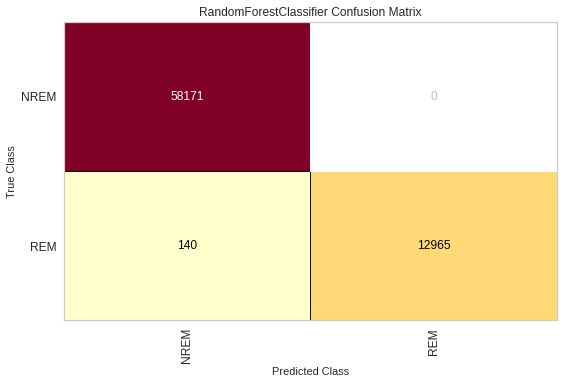

-------------------------------
-------------------------------


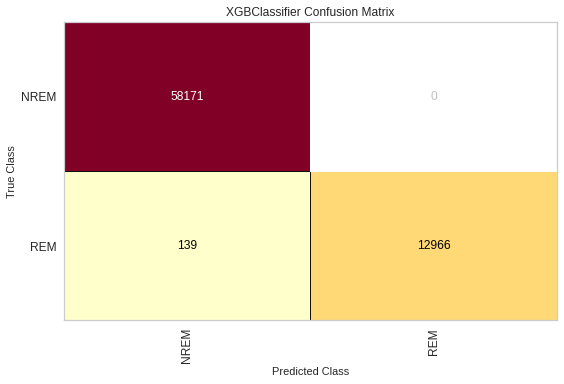

-------------------------------
-------------------------------


X does not have valid feature names, but KNeighborsClassifier was fitted with feature names


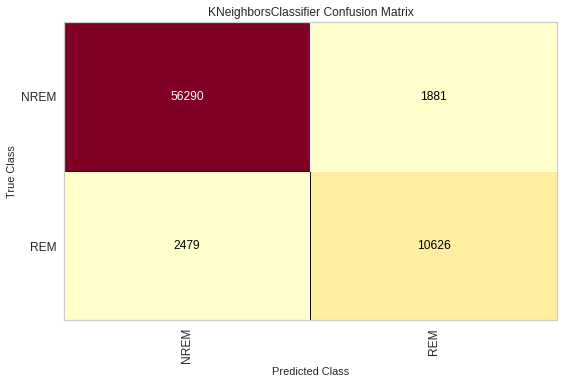

-------------------------------
-------------------------------


In [52]:
from yellowbrick.classifier import ConfusionMatrix
for i in range(len(new_keys_5)):
  if new_keys_5[i].value ==True:
    cm = ConfusionMatrix(models[i], classes=classes)

    cm.fit(X_train, y_train)
    cm.score(X_train, y_train)
    cm.show()
    print("-------------------------------")
    print("-------------------------------")

#Confusion Matrix For Testing

In [53]:
new_keys_6=models_check_box(models)

Checkbox(value=False, description='RandomForestClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(n_estimators=75, random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(max_depth=28, random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(max_depth=28, n_estimators=75, random_state=0)', ind…

Checkbox(value=False, description='XGBClassifier()', indent=False)

Checkbox(value=False, description='XGBClassifier(max_depth=29)', indent=False)

Checkbox(value=False, description='XGBClassifier(n_estimators=174)', indent=False)

Checkbox(value=False, description='XGBClassifier(max_depth=29, n_estimators=174)', indent=False)

Checkbox(value=False, description='KNeighborsClassifier()', indent=False)

Checkbox(value=False, description='KNeighborsClassifier(n_neighbors=3)', indent=False)

Checkbox(value=False, description='GaussianNB()', indent=False)

In [ ]:

from yellowbrick.classifier import ConfusionMatrix


for i in range(len(new_keys_6)):
  if new_keys_6[i].value ==True:
    cm = ConfusionMatrix(models[i], classes=classes)

    cm.fit(X_train, y_train)
    cm.score(X_test, y_test)
    cm.show()

#ROC Comparaing Machine Learning Models

In [ ]:

def ROC(mod,X_t,y_t,graph_feat):
  r_probs = [0 for _ in range(len(y_t))]

  model_probs = []


  for i in mod:
    model_probs.append(i.predict_proba(X_t))


  model_probs2=[]

  for i in model_probs:
    model_probs2.append(i[:,1])


  from sklearn.metrics import roc_curve, roc_auc_score

  model_auc=[]
  r_auc = roc_auc_score(y_t, r_probs)

  for i in model_probs2:
    model_auc.append(roc_auc_score(y_t,i))


  fpr_tpr=[]
  r_fpr, r_tpr, _ = roc_curve(y_t, r_probs)

  for i in model_probs2:
    fpr, tpr, _ = roc_curve(y_t, i)
    fpr_tpr.append((fpr,tpr))

  import matplotlib.pyplot as plt
  plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)

  for i in range(len(model_auc)):
    plt.plot(fpr_tpr[i][0], fpr_tpr[i][1], marker='.', label=str(mod[i])+' (AUROC = %0.3f)' % model_auc[i])

  # Title
  plt.title(graph_feat["Title"],fontsize= graph_feat["Title Size"], fontweight=graph_feat["Title Fontweight"])
  plt.xlabel('False Positive Rate',fontweight=graph_feat["X axis Label Fontweight"],fontsize=graph_feat["X axis Label Font Size"])
  plt.ylabel('True Positive Rate',fontweight=graph_feat["Y axis Label Fontweight"],fontsize=graph_feat["Y axis Label Font Size"])
  
  plt.legend( 
           prop = {'size' : graph_feat["legend Font Size"]}, 
           loc = graph_feat["legend Position"])
  
  fig = plt.gcf()
  fig.set_size_inches(graph_feat["Fig Width (inches)"], graph_feat["Fig Height (inches)"])
  fig.savefig(graph_feat["Fig Saving Name"], dpi=graph_feat["dpi"])
  plt.show()

***Training ROC***<br>
Chosse the Models

In [ ]:
new_keys_2=models_check_box(models)


Change  the given dictionary of graph feature for desire graph.

In [ ]:
graph_feat={
    "Title" : "ROC Plot Training",
    "Title Size":18,
    "Title Fontweight":'bold',

    "legend Font Size": 14,
    "legend Position": "lower right",

    "X axis Label Font Size":16,
    "X axis Label Fontweight":'bold',

    "Y axis Label Font Size":16,
    "Y axis Label Fontweight":'bold',

    "Fig Height (inches)":10.8,
    "Fig Width (inches)":18.8,

    "Fig Saving Name": "ROC_training.png",
    "dpi":100
    

}

mod=[]
for i in range(len(new_keys_2)):
  if new_keys_2[i].value ==True:
    mod.append(models[i])

ROC(mod,X_train,y_train,graph_feat)



---



***Testing ROC***<br>
Chosse the Models

In [ ]:
new_keys_3=models_check_box(models)


Change  the given dictionary of graph feature for desire graph.

In [ ]:
graph_feat={
    "Title" : "ROC Plot Testing",
    "Title Size":18,
    "Title Fontweight":'bold',

    "legend Font Size": 14,
    "legend Position": "lower right",

    "X axis Label Font Size":16,
    "X axis Label Fontweight":'bold',

    "Y axis Label Font Size":16,
    "Y axis Label Fontweight":'bold',

    "Fig Height (inches)":10.8,
    "Fig Width (inches)":18.8,

    "Fig Saving Name": "ROC_testing.png",
    "dpi":100

}

mod=[]
for i in range(len(new_keys_3)):
  if new_keys_3[i].value ==True:
    mod.append(models[i])

ROC(mod,X_test,y_test,graph_feat)

#Cross_val_score 





In [ ]:
from sklearn.model_selection import cross_val_score

k=5
for i in result:
  print(i[0]," -> Accuracy: ",result[i])
  l=list(cross_val_score(i[0],X_new.iloc[:,1:], y_new,cv=k))
  avg=sum(l)/k
  print(i[0]," -> AVG Accurecy After CV: "+str(avg)+ " (For "+str(k)+" Fold)")
  print("--------------------------------------------------------------------------")

#CV ROC

In [ ]:


def CV_ROC(model,folds,graph_feat):
  import matplotlib.pyplot as plt

  from sklearn import svm
  from sklearn.metrics import auc,roc_curve
  from sklearn.metrics import RocCurveDisplay
  from sklearn.model_selection import StratifiedKFold


  cv = StratifiedKFold(n_splits=folds)



  tprs = []
  aucs = []
  mean_fpr = np.linspace(0,1,100)
  i = 1
  for train,test in cv.split(X_new.iloc[:,1:], y_new.values):
      prediction = model.fit(X_new.iloc[:,1:].values[train], y_new.values[train]).predict_proba(X_new.iloc[:,1:].values[test])
      fpr, tpr, t = roc_curve(y_new.values[test], prediction[:, 1])
      tprs.append(np.interp(mean_fpr, fpr, tpr))
      roc_auc = auc(fpr, tpr)
      aucs.append(roc_auc)
      plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
      i= i+1

  plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
  mean_tpr = np.mean(tprs, axis=0)
  mean_auc = auc(mean_fpr, mean_tpr)
  plt.plot(mean_fpr, mean_tpr, color='blue',
          label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

  plt.title('CV-ROC-> '+str(model),fontsize= graph_feat["Title Size"], fontweight=graph_feat["Title Fontweight"])
  plt.xlabel('False Positive Rate',fontweight=graph_feat["X axis Label Fontweight"],fontsize=graph_feat["X axis Label Font Size"])
  plt.ylabel('True Positive Rate',fontweight=graph_feat["Y axis Label Fontweight"],fontsize=graph_feat["Y axis Label Font Size"])
  plt.legend( 
           prop = {'size' : graph_feat["legend Font Size"]}, 
           loc = graph_feat["legend Position"])
  
  fig = plt.gcf()
  fig.set_size_inches(graph_feat["Fig Width (inches)"], graph_feat["Fig Height (inches)"])
  fig.savefig(graph_feat["Fig Saving Name"], dpi=graph_feat["dpi"])
  plt.show()

In [ ]:
new_keys=models_check_box(models)

In [ ]:
# run this cell after selecting

graph_feat={
    "Title Size":18,
    "Title Fontweight":'bold',

    "legend Font Size": 14,
    "legend Position": "lower right",

    "X axis Label Font Size":16,
    "X axis Label Fontweight":'bold',

    "Y axis Label Font Size":16,
    "Y axis Label Fontweight":'bold',

    "Fig Height (inches)":10.8,
    "Fig Width (inches)":18.8,

    "Fig Saving Name": "ROC_testing.png",
    "dpi":100

}





k_fold=5

for i in range(len(new_keys)):
  if new_keys[i].value ==True:
    CV_ROC(models[i],5,graph_feat)
    print("-----------------------------------------------------------------")
    print("-----------------------------------------------------------------")

#Result CSV<br>
Predicted and Actual Row will be added at the end index

In [ ]:
def reverse_transfrom(my_list):
  for i in range(len(my_list)):
    if my_list[i] == 0:
      my_list[i] = 'Control'
    else:
      my_list[i] = 'Patient'
  return my_list

In [ ]:
new_keys_4=models_check_box(models)

In [ ]:
for i in range(len(new_keys_4)):
  if new_keys_4[i].value ==True:
    temp=X_test_with_subject

    prediction_cls = reverse_transfrom(list(models[i].predict(X_test[0:])))
    actual_cls = reverse_transfrom(list(y_test[0:]))

    temp["Actual"] = actual_cls
    temp["Predicted"] = prediction_cls

    temp.to_csv(str(models[i])+".csv")